# **Forecasting**

## Import Libraries and Dependencies

In [1]:
#Import your libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation


%matplotlib inline

## Import Stock Portfolio Data

In [2]:
total_portfolio = pd.read_csv('../../Resources/Stock_Portfolio_Prices.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)

total_portfolio.tail(10)

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2021-05-21,125.430000,316.230011,599.669983,250.690002,1224.119995,200.009995,140.520004,580.880005,54.450001,109.830002
2021-05-24,127.099998,324.630005,624.479980,257.170013,1261.430054,210.949997,142.330002,606.440002,57.060001,112.930000
2021-05-25,126.900002,327.790009,625.909973,258.649994,1240.000000,216.199997,144.460007,604.690002,57.000000,112.550003
2021-05-26,126.849998,327.660004,628.000000,261.369995,1238.829956,222.339996,148.320007,619.130005,57.849998,114.489998
2021-05-27,125.279999,332.750000,619.520020,259.470001,1240.839966,220.899994,149.000000,630.849976,58.080002,115.349998
2021-05-28,124.610001,328.730011,649.780029,260.019989,1242.869995,222.520004,150.580002,625.219971,58.000000,117.320000
2021-06-01,124.279999,329.130005,650.580017,259.269989,1251.560059,221.949997,152.360001,623.900024,57.439999,113.559998
2021-06-02,125.059998,329.149994,671.130005,262.170013,1229.589966,220.410004,152.740005,605.119995,57.160000,111.730003
2021-06-03,123.540001,326.040009,678.789978,257.790009,1199.000000,211.429993,146.589996,572.840027,57.009998,108.430000


In [3]:
#Add a second header to your portfolio dataframe
total_portfolio.columns = pd.MultiIndex.from_tuples(
    zip(total_portfolio.columns, ['close','close', 'close','close', 'close','close', 'close','close', 'close','close']
        ))

total_portfolio.head()

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,
2016-01-04,24.323219,102.220001,31.661398,34.750000,25.719999,12.16,17.99,44.681999,22.559999,22.110001
2016-01-05,23.713696,102.730003,32.170021,34.310001,25.309999,11.51,19.50,44.686001,21.920000,21.990000
2016-01-06,23.249626,102.970001,30.839788,33.980000,25.299999,11.52,20.66,43.807999,21.389999,21.959999
2016-01-07,22.268383,97.919998,29.617151,33.130001,24.670000,11.16,20.18,43.130001,20.260000,21.500000
2016-01-08,22.386133,97.330002,28.981380,32.689999,24.930000,11.31,19.17,42.200001,19.980000,22.100000


## Simulate One Year Forecasting

In [5]:
 # Configure a Monte Carlo simulation to forecast one year of cumulative returns for your portfolio
MC_even_dist = MCSimulation(
    portfolio_data = total_portfolio,
    weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    num_simulation = 1000,
    num_trading_days = 252
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AAPL                       FB                    NVDA  \
                close daily_return       close daily_return      close   
Date                                                                     
2016-01-04  24.323219          NaN  102.220001          NaN  31.661398   
2016-01-05  23.713696    -0.025059  102.730003     0.004989  32.170021   
2016-01-06  23.249626    -0.019570  102.970001     0.002336  30.839788   
2016-01-07  22.268383    -0.042205   97.919998    -0.049043  29.617151   
2016-01-08  22.386133     0.005288   97.330002    -0.006025  28.981380   

                              PYPL                    SHOP               \
           daily_return      close daily_return      close daily_return   
Date                                                                      
2016-01-04          NaN  34.750000          NaN  25.719999          NaN   
2016-01-05     0.016064  34.310001    -0.012662  25.309999    -0.015941   
2016-01-06    -0.041350  33.980000    -0.009618  25.299999    -0.000395   
2016-01-07    -0.039645  33.130001    -0.025015  24.670000    -0.024901   
2016-01-08    -0.021466  32.689999    -0.013281  24.930000     0.010539   

               SQ                TDOC                    TSLA               \
            close daily_return  close daily_return      close daily_return   
Date                                                                         
2016-01-04  12.16          NaN  17.99          NaN  44.681999          NaN   
2016-01-05  11.51    -0.053454  19.50     0.083936  44.686001     0.000090   
2016-01-06  11.52     0.000869  20.66     0.059487  43.807999    -0.019648   
2016-01-07  11.16    -0.031250  20.18    -0.023233  43.130001    -0.015477   
2016-01-08  11.31     0.013441  19.17    -0.050050  42.200001    -0.021563   

                 TWTR                       Z               
                close daily_return      close daily_return  
Date                                                        
2016-01-04  22.559999          NaN  22.110001          NaN  
2016-01-05  21.920000    -0.028369  21.990000    -0.005427  
2016-01-06  21.389999    -0.024179  21.959999    -0.001364  
2016-01-07  20.260000    -0.052828  21.500000    -0.020947  
2016-01-08  19.980000    -0.013820  22.100000     0.027907

In [6]:
# Run a Monte Carlo simulation to forecast one year of cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995763,1.005429,0.994383,1.002126,0.999859,1.002446,1.009023,1.006002,0.998846,0.999604,...,0.991079,0.993106,1.006591,1.000601,1.008890,1.001840,1.000483,1.004419,0.997335,1.002033
2,0.992384,0.998651,0.987670,1.006836,1.001087,1.002515,1.003336,1.012143,0.988266,1.004281,...,1.005817,1.000618,1.003762,1.003263,1.025375,1.005791,1.003536,0.993620,0.994091,0.996879
3,0.995528,0.995274,0.981669,1.011153,0.990954,1.001863,1.019434,1.023574,0.987063,1.015794,...,1.013733,1.000743,0.995531,1.005497,1.023307,1.000130,1.009070,0.984674,0.983405,0.987914
4,0.985549,0.995782,0.990942,1.014371,1.004919,1.017680,1.025197,1.022967,0.995456,1.038942,...,0.999262,0.998973,0.986082,1.011215,1.033480,1.010626,1.039998,0.989398,0.987656,0.980567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.783248,1.306138,1.489776,2.163627,1.334213,1.706014,2.241305,2.270442,1.612416,2.061943,...,2.082374,1.275226,1.384720,2.254375,1.627186,1.790130,1.388789,1.512265,1.666041,2.502562
249,1.798007,1.288186,1.511626,2.188252,1.361673,1.714463,2.243640,2.279453,1.618131,2.027290,...,2.087420,1.283107,1.410611,2.245636,1.631655,1.778342,1.405142,1.525730,1.654202,2.516439
250,1.815327,1.296213,1.513522,2.203619,1.346815,1.710980,2.215649,2.290330,1.633931,2.009257,...,2.113872,1.292097,1.429050,2.238995,1.617535,1.760873,1.428873,1.524234,1.646119,2.513463
251,1.850311,1.297650,1.497079,2.229300,1.370279,1.699109,2.215369,2.285874,1.666812,2.008902,...,2.126026,1.309748,1.442938,2.251280,1.617923,1.760714,1.416076,1.530733,1.666552,2.517242


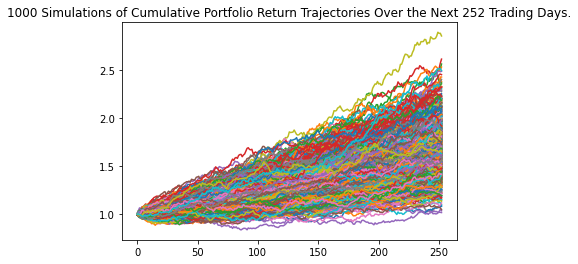

In [9]:
line_plot = MC_even_dist.plot_simulation()

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.681533
std                0.265366
min                1.016659
25%                1.499889
50%                1.655184
75%                1.843273
max                2.857327
95% CI Lower       1.229453
95% CI Upper       2.231904
Name: 252, dtype: float64
